# Exercises

In [44]:
import skimage
import numpy as np

In these exercises, you will work on an image that shows a glacier, taken with a satellite, in the years 2021 and 2022. It is an RGB image, i.e. it has 3 channels (red, green and blue).
The goal is to do a simple, **automatic analysis of the image** and to answer the question **whether the area of the glacier has changed**.

More background information: https://www.copernicus.eu/en/news/news/observer-monitoring-glaciers-space

1. **Load this image** into a numpy array, print its shape and display it: https://www.copernicus.eu/sites/default/files/inline-images/Picture6_8.jpg

2. **Remove the writing** on the top by saving the image beginning from row 70 in a new variable. Display the cropped image to confirm that we have a good crop.

3. Next, we want to analyse the **surface of the glacier**. We consider this to be a **white area** in the image. All pixels that exceed a certain **threshold** are considered white. So create a **mask** in which all pixels contain `True` where the pixel value is greater than 200.

4. Since we have an RGB image, there are 3 channels (red, green and blue), als in the mask created above. With `np.all()` (a new aggregating function) we can apply the **mask to all 3 channels together** to extract the white area. This means that we generate a 2D image that is only `True` where the values are above the threshold in all 3 channels. You can show the result with `plt.imshow()`.

    *Hint: use `white = np.all(mask, axis=-1)`*

5. (Optional) In many scientific contexts, it is crucial whether **ice areas have a certain minimum size**. To extract these, we can remove small, unconnected areas. We can use the function `skimage.morphology.opening()` for this purpose (for details, see below). Again display the result.

    *Hint: use `skimage.morphology.opening(white)`*

6. Now split the extracted image with the white pixels into the **parts showing 2021 and 2022**, respectively (just create 2 crops along the middle and save them in variables).

7. Calculate the **area of the glacier** in 2021 and 2022 by counting the number of pixels that are `True` in the respective images. You can simply use `np.sum()` for this. Print it and make a **conclusion about the change** in the glacier area.


*`skimage.morphology.opening()`: This function first removes a few pixels from the edge of all areas and then adds the same number of pixels to the result. The effect is that small areas are deleted because after the pixels have been removed there is no area left to which pixels could be added again. The result is a **mask** that only contains areas with a certain minimum size. Even more information you can find in the [documentation](https://scikit-image.org/docs/stable/api/skimage.morphology.html#skimage.morphology.opening)*

In [45]:

### YOUR CODE HERE


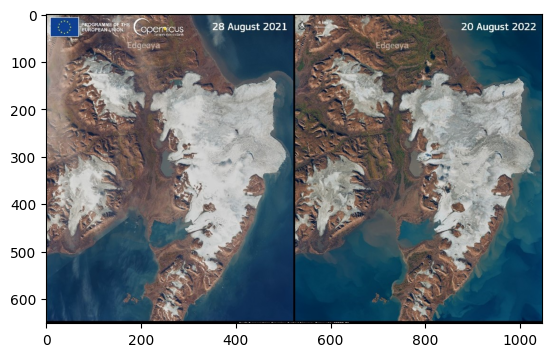

In [46]:
img = skimage.io.imread("https://www.copernicus.eu/sites/default/files/inline-images/Picture6_8.jpg")
plt.imshow(img)

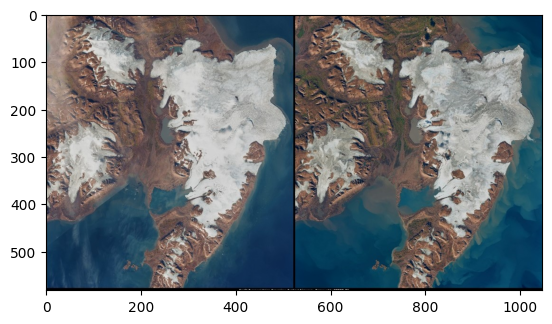

In [47]:
img_crop = img[70:].copy()
plt.imshow(img_crop)

In [48]:
white_mask = img_crop > 200

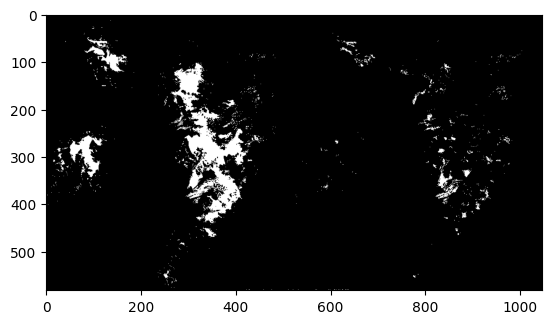

In [49]:
white_pixels = np.all(white_mask, axis=-1)
plt.imshow(white_pixels, cmap='gray')

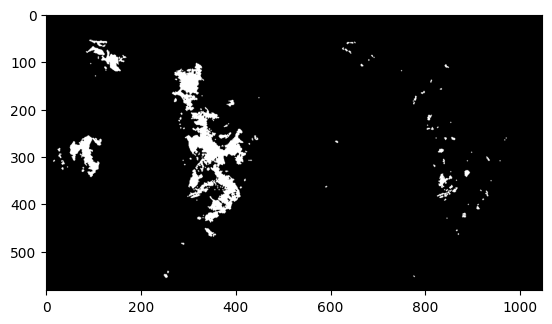

In [50]:
white_patches = skimage.morphology.opening(white_pixels)
plt.imshow(white_patches, cmap='gray')

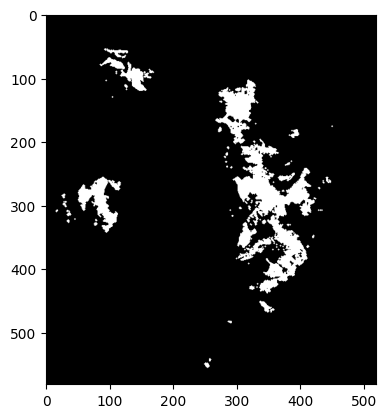

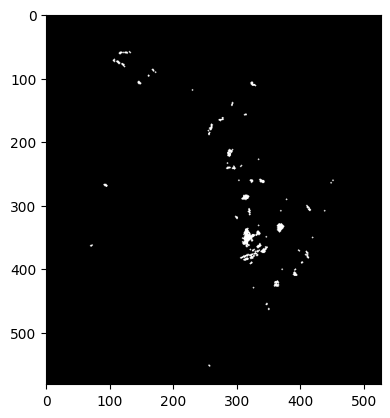

In [51]:
white_21 = white_patches[:, :520]
white_22 = white_patches[:, 520:]

plt.imshow(white_21, cmap='gray')
plt.show()
plt.imshow(white_22, cmap='gray')
plt.show()

In [52]:
area_21 = np.sum(white_21)
area_22 = np.sum(white_22)
perc_change = (area_21 - area_22) / area_21 * 100

print("Area of the glacier in 2021:", area_21)
print("Area of the glacier in 2022:", area_22)
print("Change in area:", area_22 - area_21)
print("The glacier has decreased by", round(perc_change, 2), "%.")

Area of the glacier in 2021: 18948
Area of the glacier in 2022: 1723
Change in area: -17225
The glacier has decreased by 90.91 %.


### EXTRA: PLOT

<BarContainer object of 2 artists>

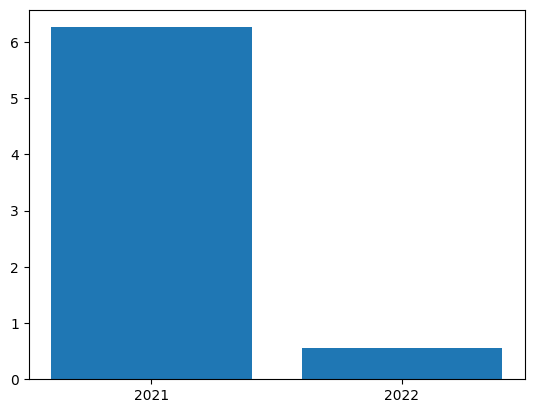

In [53]:
from matplotlib import pyplot as plt

plt.bar(["2021", "2022"], [area_21/white_21.size*100, area_22/white_22.size*100])